# Reshaping Data
## Tidy Data
It is estimated that 80% of data analysis is spent on the process of cleaning and preparing the data. Hadley Wickham, a prominent statistican, coined the term [tidy data](https://vita.had.co.nz/papers/tidy-data.pdf). He describes data tidying as the process of structuring datasets to facilitate analysis. He defines tidy data by the following structure:
* each variable is a column
* each row is an observation
* each type of observational unit is a table

Tidy datasets are easy to manipulate, model, and visualize. Please keep this in mind as you explore different datasets in this block of the course.

Untidy data can be untidy for a variety of reasons. Often, untidy data results to benefit a human who must read and interpret the data. Take the following untidy data example:

|Country | 2011 | 2012 | 2013 |
| :----: | :----: | :----: | :----: |
| FR | 7000 | 6900 | 7000 |
| DE | 5800 | 6000 | 6200 |
| US | 15000 | 14000 | 13000 |

In this case, it is easier to read, as a human, because it is more compact, each column is a year, and each row is a country. From a data analysis perspective, this is untidy and difficult to work with because the variables are country, year, and cases. In this format, each row is made up of three distinct observations. This makes it challenging to answer questions like: what is the average number of cases for a particular country? It makes it challenging to plot the data over time.

Instead, tidy data should take the form:

| Country | Year | Cases |
| :----: | :----: | :----: |
| FR | 2011 | 7000 |
| DE | 2011 | 5800 |
| US | 2011 | 15000 |
| FR | 2012 | 6900 |
| DE | 2012 | 6000 |
| US | 2012 | 14000 |
| FR | 2013 | 7000 |
| DE | 2013 | 6200 |
| US | 2013 | 13000 |

## Melt
One common format of data that does not meet the definition of tidy data looks like one summarizing the number of tuberculosis cases in the World Health Organization's report:
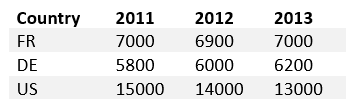

In this case, there are three variables:
* Country: first column
* Year: depicted in the three column labels
* Cases: found in the body of the table
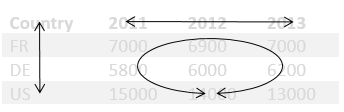

In order to reshape this data into a format that is tidy, we need to 'unpivot' the year column labels so that they are a single column and match up its corresponding number of cases value so they are side by side in two columns. As a result, the number of rows goes from three in the current form to nine in the tidy form. For this reason, tidy data is often referred to as 'long' form whereas the original data is referred to as 'wide' form.

The below depicts how unpivoting a single year column becomes three separate rows where the year label is repeated for each country:
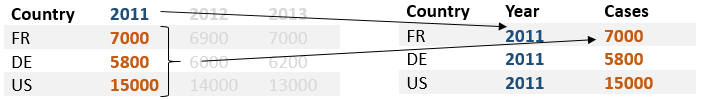

Similarly, the 2012 column becomes unpivoted:
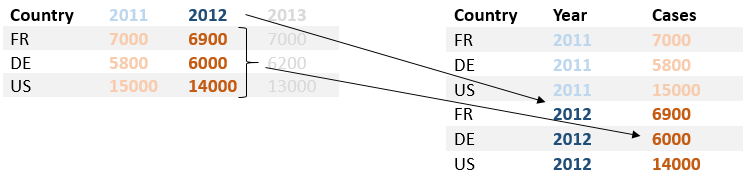

Finally, the 2013 column to complete the reshaping:
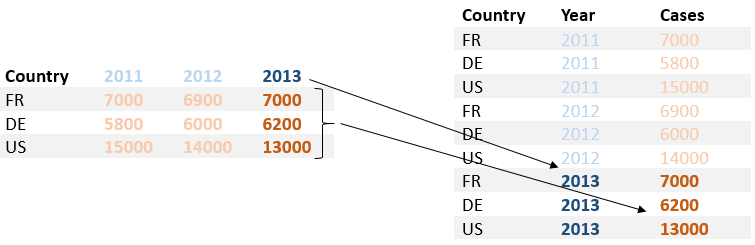

In [1]:
import pandas as pd
import numpy as np

In [2]:
cases = pd.read_csv('cases.csv')
cases

,country,2011,2012,2013
0,FR,7000,6900,7000
1,DE,5800,6000,6200
2,US,15000,14000,13000


In order to reshape this data into a format that one can easily manipulate, we will use the `melt` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html) or [DataFrame method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.melt.html) in Pandas. You only need to specify an argument for the `id_vars` or `value_vars` parameters (whichever has fewer columns to specify).
* `id_vars`: expects a list of column labels that will **not** be unpivoted
* `value_vars`: expects a list of column labels that will be unpivoted

In this case, since there is only one column that will be left as is (country) and three columns to unpivot, it makes sense to specify an argument for the `id_vars` parameter.

We will also specify arguments for two additional parameters so that we can control what the labels will become for the two new columns we are creating.
* `var_name`: name to use for the column that contains the old column labels (year, in this example)
* `value_name`: name to use for the column that contains the values (cases, in this example)

In [ ]:
cases.melt(id_vars=['country'],  # columns to leave as is
           var_name='year',      # label for the values previously column labels
           value_name='cases'    # label for the values previously contained in multiple columns
          )

## Pivoting
The other untidy data format is less common and it actually requires us to go in the opposite direction. An example of this also comes from average pollution samples for three large cities
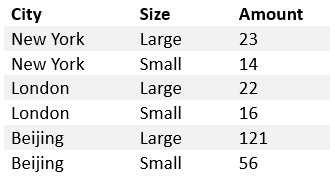

In this case, there are three variables, but the are spread between two different rows. In this data, an observation is a measurement of two different air pollutants (small and large) in a single city:
* City
* Amount of large particles
* Amount of small particles
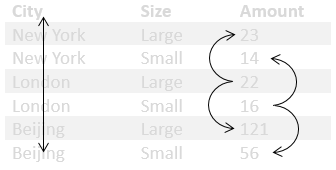

In order to reshape this data, we need to pivot the size column such that each unique value (large and small, in this case) becomes its own column in the result:
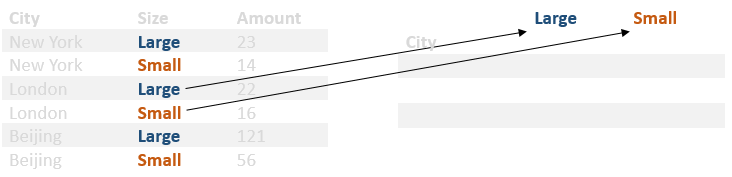

Similarly, the city column will no longer have duplicate values in its rows so it will become the index for the resulting DataFrame:
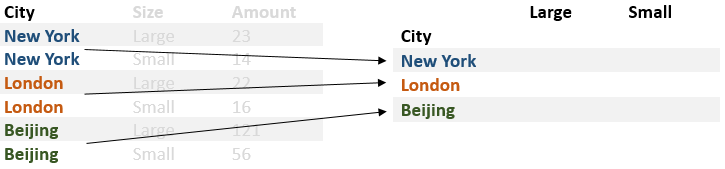

Finally, we populate the DataFrame with the values of each unique combination of city-size:
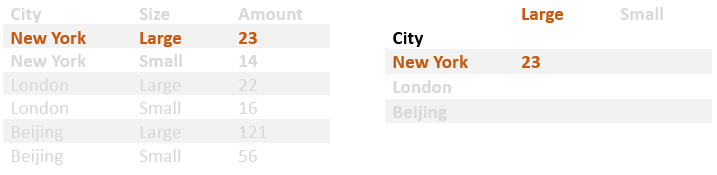

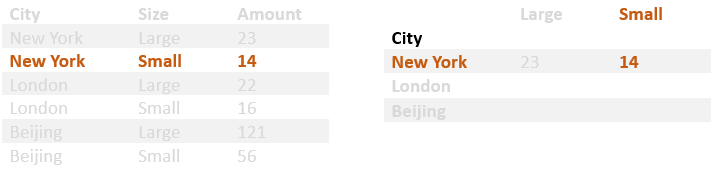

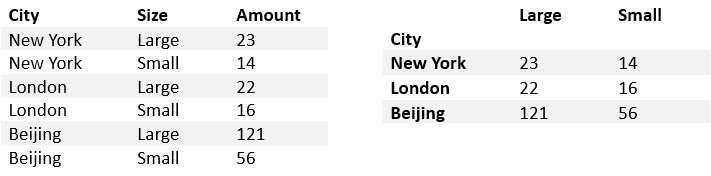

In [ ]:
pollution = pd.read_csv('pollution.csv')
pollution

In order to do this in Pandas, we will use the `pivot` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot.html) or [DataFrame method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). There are two parameters that we must specify arguments for:
* `index`: the column for which unique values will become the new index (row labels)
* `columns`: the column for which unique values will be pivoted and become the new column labels

In [ ]:
pollution.pivot(index='city',   # column to be the new index
                columns='size', # column to pivot to become the new column labels
                values='amount' # optional, column to populate the values for the new column labels
               )

It is possible to have a list of column labels for the `values` argument. In this case, the column labels would be become a hierarchically indexed columns similar to a multi-index. This is the default behavior if you do not specify an argument for the `values` parameter:

In [ ]:
pollution.pivot(index='city',
                columns='size')

If there were additional columns, then the large and small labels would be repeated for each column.

### Pivot Table
For `pivot` to work, there needs to be at most one observation for each unique combination of city-size. If there were multiple observations for New York-large, then `pivot` would not know which value to report and it would raise an exception. For instance, suppose the dataset provided multiple samples for each location and particle size (over time, for instance):

In [ ]:
pollution_2 = pd.read_csv('pollution2.csv')
pollution_2

Trying to use `pivot` on this dataset will raise an exception:

In [ ]:
pollution_2.pivot(index='city', columns='size', values='amount')

In this case, we have multiple observations for unique combinations of city-size so we must aggregate those into a single summary statistic to report. This is exactly what we are doing when we `groupby` two columns. In this case, there is a `pivot_table` [function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) and [DataFrame method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html) that will perform the aggregation and pivot one column to produce a compact output.

There are the same required parameters as `pivot` (`values` is also still optional) and we need to specify an argument for one additional parameter:
* `aggfunc`: what aggregation function do we want to apply to summarize the result

The options for `aggfunc` are similar to those for `groupby`.

In [ ]:
pollution_2.pivot_table(index='city',     # column to be the new index
                        columns='size',   # column to pivot to become the new column labels
                        values='amount',  # optional, column to populate the values for the new column labels
                        aggfunc=np.mean   # aggregation function; other choices: len, max, min, sum, np.std
                       )

### Participation Activity
In the below Markdown cell, summarize the difference between `pivot` and `pivot_table`.